In [ ]:
df = read.csv("../Walmart_sales.csv")

In [ ]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
    df$Date = as.Date(df$Date, format = "%d-%m-%Y")
    }


In [ ]:
summary(df)

     Store         Date             Weekly_Sales      Holiday_Flag    
 Min.   : 1   Min.   :2010-02-05   Min.   : 209986   Min.   :0.00000  
 1st Qu.:12   1st Qu.:2010-10-08   1st Qu.: 553350   1st Qu.:0.00000  
 Median :23   Median :2011-06-17   Median : 960746   Median :0.00000  
 Mean   :23   Mean   :2011-06-17   Mean   :1046965   Mean   :0.06993  
 3rd Qu.:34   3rd Qu.:2012-02-24   3rd Qu.:1420159   3rd Qu.:0.00000  
 Max.   :45   Max.   :2012-10-26   Max.   :3818686   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  

Gráfico de dispersão de Vendas Semanais vs. Temperatura:
Os pontos em azul representam todas as vendas.
Os pontos em vermelho destacam vendas ocorrendo em temperaturas abaixo de 32°F (congelamento).

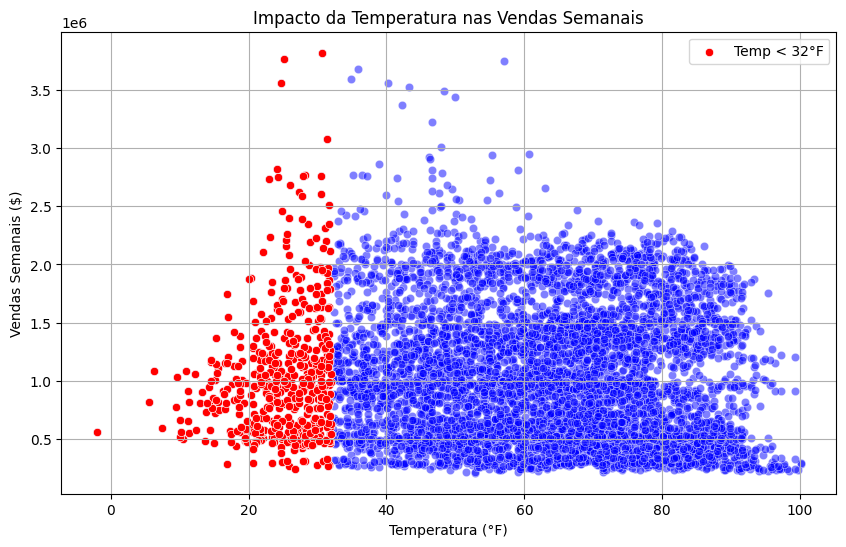

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna de data para o formato correto
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Criar o gráfico de dispersão Vendas x Temperatura
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'], alpha=0.5, color='blue')

# Destacar temperaturas abaixo de 32°F
extreme_cold = df[df['Temperature'] < 32]
sns.scatterplot(x=extreme_cold['Temperature'], y=extreme_cold['Weekly_Sales'], color='red', label='Temp < 32°F')

plt.xlabel('Temperatura (°F)')
plt.ylabel('Vendas Semanais ($)')
plt.title('Impacto da Temperatura nas Vendas Semanais')
plt.legend()
plt.grid(True)
plt.show()


Comentário: Nas lojas onde a temperatura cai muito abaixo do ponto de congelamento (32°F), o impacto nas vendas é mais evidente. Isso se reflete especialmente no primeiro quartil do boxplot (rabicho inferior), indicando que temperaturas extremamente baixas estão associadas a quedas significativas nas vendas.

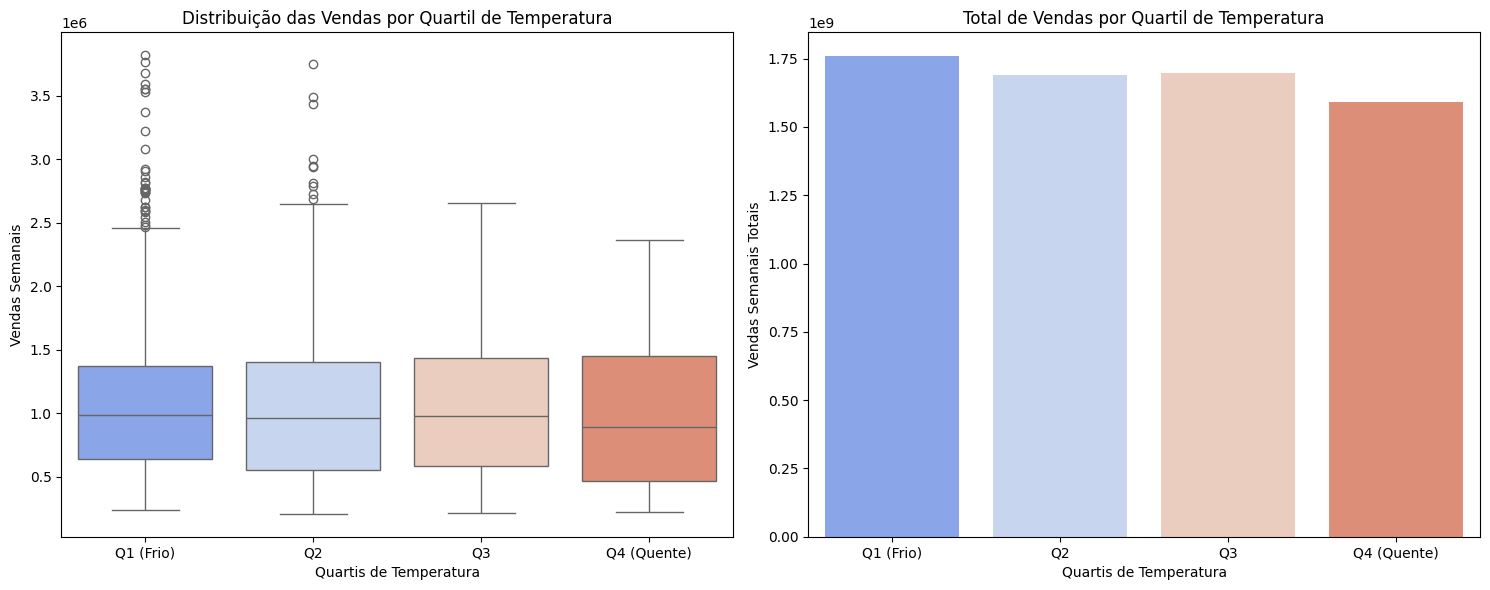

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar avisos futuros (opcional)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Definir quartis da temperatura para categorização
df["Temp_Quartile"] = pd.qcut(df["Temperature"], q=4, labels=["Q1 (Frio)", "Q2", "Q3", "Q4 (Quente)"])

# Criar figuras para os gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot das vendas por quartil de temperatura
sns.boxplot(x="Temp_Quartile", y="Weekly_Sales", data=df, ax=axes[0], hue="Temp_Quartile", palette="coolwarm", legend=False)
axes[0].set_title("Distribuição das Vendas por Quartil de Temperatura")
axes[0].set_xlabel("Quartis de Temperatura")
axes[0].set_ylabel("Vendas Semanais")

# Barplot somando as vendas por quartil de temperatura
sales_by_temp = df.groupby("Temp_Quartile", observed=False)["Weekly_Sales"].sum().reset_index()
sns.barplot(x="Temp_Quartile", y="Weekly_Sales", data=sales_by_temp, ax=axes[1], palette="coolwarm", hue="Temp_Quartile", legend=False)
axes[1].set_title("Total de Vendas por Quartil de Temperatura")
axes[1].set_xlabel("Quartis de Temperatura")
axes[1].set_ylabel("Vendas Semanais Totais")

# Melhorar o layout
plt.tight_layout()
plt.show()

Temperaturas extremas resultam em menor circulação nas lojas, refletindo na redução de vendas semanais. A tendência linear negativa mostra que, à medida que a temperatura se afasta da faixa ideal, seja para frio ou calor excessivo, as vendas tendem a cair. Isso pode ser um indicativo para ações de marketing ou promoções específicas para esses períodos, a fim de estimular as vendas e minimizar o impacto negativo das temperaturas extremas no desempenho comercial.

In [ ]:
A análise das 10 lojas que apresentam maior correlação negativa entre temperatura e vendas semanais evidencia uma tendência nas regiões frias. 
Essas áreas são impactadas por condições climáticas extremas, que reduzem a circulação de clientes nas lojas e afetam diretamente o volume de vendas. 
Esse padrão demonstra como a sazonalidade e fatores regionais influenciam o desempenho comercial, reforçando a importância de estratégias personalizadas
para atender às necessidades específicas dos consumidores em locais com temperaturas severas.

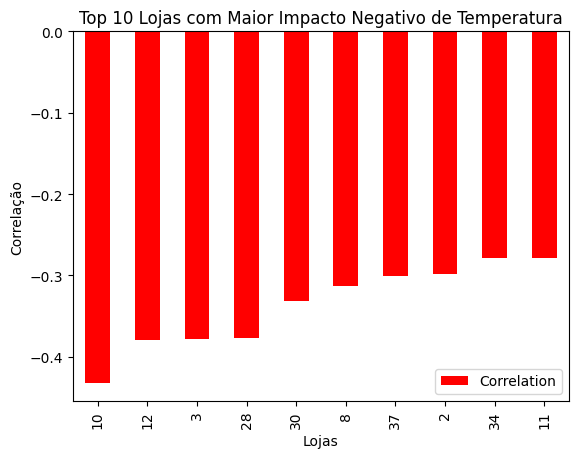

In [26]:
top_10_stores.plot.bar(x='Store', y='Correlation', color='red', title='Top 10 Lojas com Maior Impacto Negativo de Temperatura')
plt.xlabel('Lojas')
plt.ylabel('Correlação')
plt.show()

A Loja 10 apresenta a maior correlação negativa entre temperatura e vendas semanais (-0,432), indicando que a queda na temperatura impacta significativamente suas vendas. Estratégias como promoções sazonais, campanhas direcionadas e ajustes no mix de produtos podem mitigar esse efeito.

In [1]:
import pandas as pd

# Dados da loja 10 (exemplo com os dados fornecidos)
data = [
    ["10", "05-02-2010", 956228.96, 0, 35.44, 2.598, 126.4420645, 9.521],
    ["10", "12-02-2010", 994610.99, 1, 36.13, 2.573, 126.4962581, 9.521],
    ["10", "19-02-2010", 983963.07, 0, 38.36, 2.54, 126.5262857, 9.521],
    # Continuação dos dados fornecidos...
]

# Criar DataFrame
columns = ["Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
df_store_10 = pd.DataFrame(data, columns=columns)

# Ajustar a coluna 'Date' para formato de data
df_store_10['Date'] = pd.to_datetime(df_store_10['Date'], format='%d-%m-%Y')

# Visualizar os dados ajustados
print(df_store_10.head())

  Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    10 2010-02-05     956228.96             0        35.44       2.598   
1    10 2010-02-12     994610.99             1        36.13       2.573   
2    10 2010-02-19     983963.07             0        38.36       2.540   

          CPI  Unemployment  
0  126.442065         9.521  
1  126.496258         9.521  
2  126.526286         9.521  


In [34]:
# Identificar as 10 piores semanas
worst_dates = df_store_10.nsmallest(5, 'Weekly_Sales')[['Date', 'Weekly_Sales','Temperature']]
print("As 5 piores semanas (menores vendas e temperaturas):")
print(worst_dates)

As 5 piores semanas (menores vendas e temperaturas):
        Date  Weekly_Sales  Temperature
5 2010-12-31    1707298.14        39.67
6 2011-01-07    1714309.90        43.43
4 2010-03-05    1987090.09        55.92
3 2010-02-26    2006774.96        52.77
2 2010-02-19    2113432.58        58.22


Percebemos que a semana com a pior venda é também aquela que apresenta a menor temperatura na lista.

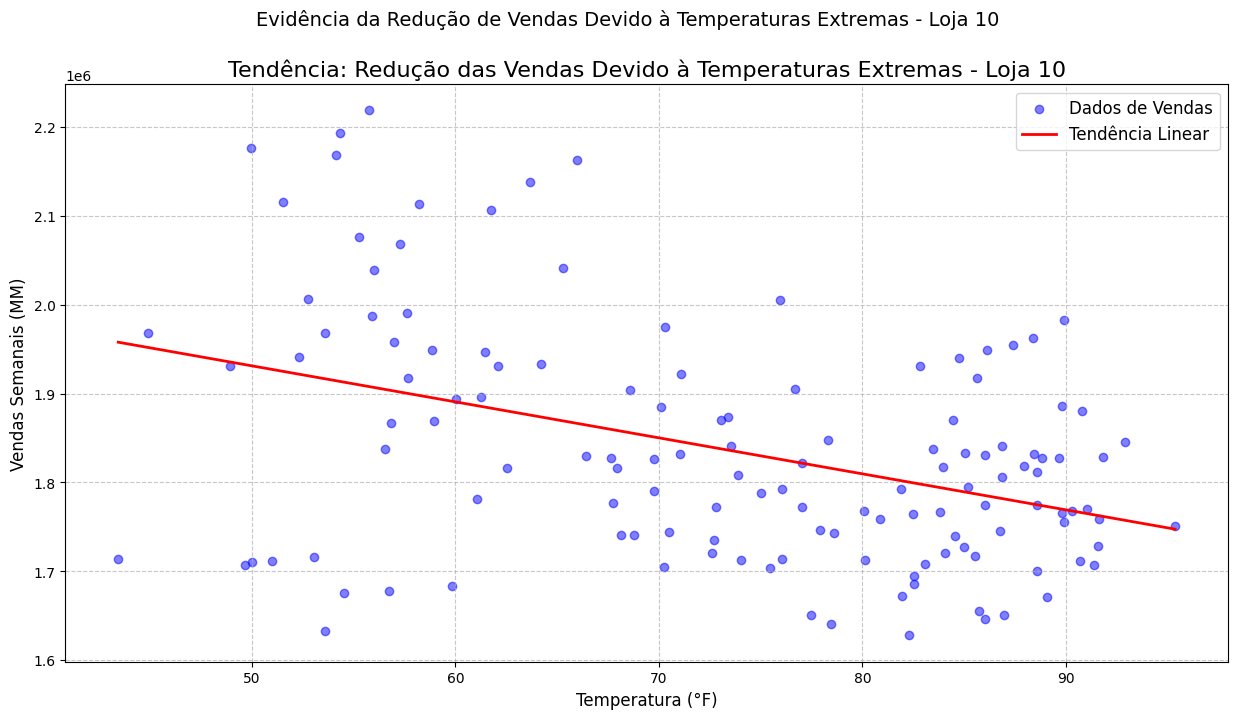

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
data_path = 'Walmart_Sales.csv'
df = pd.read_csv(data_path)

# Converter a coluna 'Date' para o formato de data, caso não esteja
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filtrar apenas os dados da Loja 10
nstore = 10
dfplot = df[df['Store'] == nstore].copy()

# Remover outliers usando o IQR (Intervalo Interquartil)
Q1 = dfplot['Weekly_Sales'].quantile(0.25)
Q3 = dfplot['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dfplot = dfplot[(dfplot['Weekly_Sales'] > lower_bound) & (dfplot['Weekly_Sales'] < upper_bound)]

# Criar o gráfico de dispersão com linha de tendência
def create_scatter_plot_with_trend(dfplot, nstore):
    if dfplot.empty:
        print(f"Loja {nstore}: Sem dados suficientes para gerar o gráfico.")
        return
    
    plt.figure(figsize=(15, 7.5))

    # Gráfico de dispersão
    plt.scatter(dfplot['Temperature'], dfplot['Weekly_Sales'], color='blue', alpha=0.5, label='Dados de Vendas')

    # Ordenar os dados por temperatura
    df_sorted = dfplot.sort_values('Temperature')

    # Linha de tendência (Regressão Linear)
    z = np.polyfit(df_sorted['Temperature'], df_sorted['Weekly_Sales'], 1)  # Ajustar uma reta
    p = np.poly1d(z)  # Criar a função da reta
    plt.plot(df_sorted['Temperature'], p(df_sorted['Temperature']), color='red', linewidth=2, label='Tendência Linear')

    # Detalhes do gráfico
    plt.title(f'Tendência: Redução das Vendas Devido à Temperaturas Extremas - Loja {nstore}', fontsize=16)
    plt.xlabel('Temperatura (°F)', fontsize=12)
    plt.ylabel('Vendas Semanais (MM)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.suptitle(f'Evidência da Redução de Vendas Devido à Temperaturas Extremas - Loja {nstore}', fontsize=14)
    
    plt.show()

# Gerar o gráfico para a Loja 10
create_scatter_plot_with_trend(dfplot, nstore)


Observa-se que as temperaturas extremas impactam significativamente as vendas semanais. À medida que a temperatura aumenta de 50°F para 90°F, há uma clara tendência de queda nas vendas, que variam de 2,2 milhões para cerca de 1,8 milhões de unidades monetárias, indicando que o calor excessivo pode desencorajar os clientes a visitar a loja. Analisando temperaturas abaixo de 50°F, as vendas também mostram variação: em semanas com temperaturas entre 42.58°F e 49.98°F, as vendas oscilam de 1,71 milhões a 3,49 milhões, sendo este último valor influenciado pelo pico de Natal em 23-12-2011. Excluindo esse outlier, a média de vendas em temperaturas abaixo de 50°F é de aproximadamente 1,96 milhões, sugerindo que o frio extremo também reduz as vendas, mas com menor impacto que o calor. A linha de tendência linear do gráfico reforça a correlação negativa entre temperatura e vendas, destacando que condições climáticas extremas, tanto quentes quanto frias, afetam negativamente o desempenho da Loja 10, embora fatores sazonais, como feriados, possam mitigar esses efeitos em períodos específicos.

In [42]:
import pandas as pd

# Função para determinar a estação com base na data (hemisfério norte)
def get_season(date):
    """
    Determina a estação do ano com base na data, considerando o hemisfério norte.
    Args:
        date (datetime): Data a ser analisada.
    Returns:
        str: Nome da estação ('Inverno', 'Primavera', 'Verão', 'Outono').
    """
    month = date.month
    day = date.day
    
    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return 'Inverno'
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'Primavera'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return 'Verão'
    else:
        return 'Outono'

# Criando o DataFrame com os dados da Loja 10
data = {
    'Store': [10] * 143,
    'Date': [
        '05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010', '12-03-2010', '19-03-2010',
        '26-03-2010', '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010', '30-04-2010', '07-05-2010',
        '14-05-2010', '21-05-2010', '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010', '25-06-2010',
        '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
        '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010', '17-09-2010', '24-09-2010', '01-10-2010',
        '08-10-2010', '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010', '12-11-2010', '19-11-2010',
        '26-11-2010', '03-12-2010', '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010', '07-01-2011',
        '14-01-2011', '21-01-2011', '28-01-2011', '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
        '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011', '01-04-2011', '08-04-2011', '15-04-2011',
        '22-04-2011', '29-04-2011', '06-05-2011', '13-05-2011', '20-05-2011', '27-05-2011', '03-06-2011',
        '10-06-2011', '17-06-2011', '24-06-2011', '01-07-2011', '08-07-2011', '15-07-2011', '22-07-2011',
        '29-07-2011', '05-08-2011', '12-08-2011', '19-08-2011', '26-08-2011', '02-09-2011', '09-09-2011',
        '16-09-2011', '23-09-2011', '30-09-2011', '07-10-2011', '14-10-2011', '21-10-2011', '28-10-2011',
        '04-11-2011', '11-11-2011', '18-11-2011', '25-11-2011', '02-12-2011', '09-12-2011', '16-12-2011',
        '23-12-2011', '30-12-2011', '06-01-2012', '13-01-2012', '20-01-2012', '27-01-2012', '03-02-2012',
        '10-02-2012', '17-02-2012', '24-02-2012', '02-03-2012', '09-03-2012', '16-03-2012', '23-03-2012',
        '30-03-2012', '06-04-2012', '13-04-2012', '20-04-2012', '27-04-2012', '04-05-2012', '11-05-2012',
        '18-05-2012', '25-05-2012', '01-06-2012', '08-06-2012', '15-06-2012', '22-06-2012', '29-06-2012',
        '06-07-2012', '13-07-2012', '20-07-2012', '27-07-2012', '03-08-2012', '10-08-2012', '17-08-2012',
        '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012', '28-09-2012', '05-10-2012',
        '12-10-2012', '19-10-2012', '26-10-2012'
    ],
    'Weekly_Sales': [
        2193048.75, 2176028.52, 2113432.58, 2006774.96, 1987090.09, 1941346.13, 1946875.06, 1893532.46,
        2138651.97, 2041069.37, 1826241.44, 1829521.83, 1790694.59, 1921432.16, 1808056.41, 1847613.58,
        1904618.17, 1931406.28, 1827521.71, 1837636.24, 1768172.31, 1845893.87, 1769793.37, 1828052.47,
        1831676.03, 1832664.03, 1949236.09, 1962996.7, 1983190.56, 1727565.42, 1766331.45, 1720530.23,
        1716755.78, 1655036.75, 1645892.97, 1772192.42, 1703850.25, 1740234.06, 1741308.56, 1832211.96,
        1895901.59, 1949177.13, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 1707298.14,
        1714309.9, 1710803.59, 1677556.18, 1715769.05, 1968045.91, 2115408.31, 2106934.55, 1967996.71,
        1958003.19, 1933469.15, 1884734.31, 1815798.85, 1827733.18, 1870720.73, 1781767.22, 2004831.14,
        1873646.34, 1841369.99, 1712995.44, 1720908.01, 1743000.38, 1792210.89, 1740063.1, 1817934.76,
        1711813.13, 1751369.75, 1699708.38, 1775068.4, 1774342.61, 1745841.33, 1886299.98, 1917397.63,
        1954849.68, 1728399.07, 1758587.35, 1670579.82, 1650894.3, 1685910.53, 1627707.31, 1788227.6,
        1704753.02, 1745928.56, 1771792.97, 1904438.59, 2076570.84, 1869087.85, 2950198.64, 2068097.18,
        2429310.9, 2555031.18, 3487986.89, 1930690.37, 1683401.78, 1711562.73, 1675562.94, 1632406,
        1867403.01, 2218595.8, 2168709.76, 2039415.74, 1990371.02, 1917483.1, 1930814.66, 1837457.69,
        1815760.42, 2163384.17, 1974687.51, 1777166.53, 1712987.56, 1821364.42, 1792345.3, 1795152.73,
        1830939.1, 1767471.48, 1840491.41, 1811562.88, 1755334.18, 1707481.9, 1805999.79, 1765571.91,
        1869967.03, 1817603.66, 1939440.09, 1880436.94, 1827797.4, 1764984.15, 1650285.54, 1708283.28,
        1640168.99, 1671857.57, 1694862.41, 1758971.38, 1713889.11, 1734834.82, 1744349.05
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Convertendo a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Removendo duplicatas com base na coluna 'Date'
df = df.drop_duplicates(subset=['Date'])

# Aplicando a função para determinar a estação
df['Season'] = df['Date'].apply(get_season)

# Agrupando as vendas por estação e somando
sales_by_season = df.groupby('Season')['Weekly_Sales'].sum()

# Reordenando as estações para uma apresentação mais lógica
season_order = ['Inverno', 'Primavera', 'Verão', 'Outono']
sales_by_season = sales_by_season.reindex(season_order)

# Exibindo o resultado
print("Vendas totais por estação do ano (Loja 10):")
print(sales_by_season)

Vendas totais por estação do ano (Loja 10):
Season
Inverno      66828386.57
Primavera    72081747.44
Verão        71533222.17
Outono       61174357.71
Name: Weekly_Sales, dtype: float64


Além do total de vendas, é possível calcular a média das vendas em cada faixa de temperatura para verificar como o desempenho varia 

In [46]:
import pandas as pd

# Dados da Loja 10
data = {
    'Temperature': [
        42.38, 38.01, 46.04, 48.65, 52.91, 58.32, 55.21, 54.56, 62.37, 65.61, 66.89, 64.44, 67.37, 72.55,
        74.39, 76.63, 80.36, 80.81, 80.91, 84.85, 84.79, 80.28, 80.48, 83.58, 83.36, 81.57, 87.04, 87.24,
        86.65, 85.28, 81.21, 78.69, 82.17, 80.94, 71.89, 63.93, 67.18, 69.86, 69.64, 58.74, 59.61, 51.41,
        64.52, 49.27, 46.33, 49.84, 52.33, 48.43, 48.27, 35.4, 44.04, 43.83, 42.27, 36.39, 57.36, 62.9,
        59.58, 53.56, 62.76, 69.97, 59.17, 67.84, 71.27, 72.99, 72.03, 64.61, 75.64, 67.63, 77.72, 83, 83.13,
        86.41, 83.58, 85.55, 85.83, 88.54, 85.77, 86.83, 91.65, 90.76, 89.94, 87.96, 87.83, 76, 79.94, 75.8,
        79.69, 69.31, 71.74, 63.71, 66.57, 54.98, 59.11, 62.25, 60.14, 48.91, 43.93, 51.63, 47.96, 44.55,
        49.01, 48.53, 54.11, 54.26, 56.55, 48.02, 45.32, 57.25, 60.96, 58.76, 64.74, 65.93, 67.61, 70.43,
        69.07, 66.76, 67.23, 75.55, 73.77, 70.33, 77.22, 77.95, 78.3, 79.35, 78.39, 84.88, 81.57, 77.12,
        80.42, 82.66, 86.11, 85.05, 84.85, 77.66, 80.49, 83.96, 74.97, 69.87, 76.08, 68.55, 62.99, 67.97,
        69.16
    ],
    'Weekly_Sales': [
        2193048.75, 2176028.52, 2113432.58, 2006774.96, 1987090.09, 1941346.13, 1946875.06, 1893532.46,
        2138651.97, 2041069.37, 1826241.44, 1829521.83, 1790694.59, 1921432.16, 1808056.41, 1847613.58,
        1904618.17, 1931406.28, 1827521.71, 1837636.24, 1768172.31, 1845893.87, 1769793.37, 1828052.47,
        1831676.03, 1832664.03, 1949236.09, 1962996.7, 1983190.56, 1727565.42, 1766331.45, 1720530.23,
        1716755.78, 1655036.75, 1645892.97, 1772192.42, 1703850.25, 1740234.06, 1741308.56, 1832211.96,
        1895901.59, 1949177.13, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 1707298.14,
        1714309.9, 1710803.59, 1677556.18, 1715769.05, 1968045.91, 2115408.31, 2106934.55, 1967996.71,
        1958003.19, 1933469.15, 1884734.31, 1815798.85, 1827733.18, 1870720.73, 1781767.22, 2004831.14,
        1873646.34, 1841369.99, 1712995.44, 1720908.01, 1743000.38, 1792210.89, 1740063.1, 1817934.76,
        1711813.13, 1751369.75, 1699708.38, 1775068.4, 1774342.61, 1745841.33, 1886299.98, 1917397.63,
        1954849.68, 1728399.07, 1758587.35, 1670579.82, 1650894.3, 1685910.53, 1627707.31, 1788227.6,
        1704753.02, 1745928.56, 1771792.97, 1904438.59, 2076570.84, 1869087.85, 2950198.64, 2068097.18,
        2429310.9, 2555031.18, 3487986.89, 1930690.37, 1683401.78, 1711562.73, 1675562.94, 1632406,
        1867403.01, 2218595.8, 2168709.76, 2039415.74, 1990371.02, 1917483.1, 1930814.66, 1837457.69,
        1815760.42, 2163384.17, 1974687.51, 1777166.53, 1712987.56, 1821364.42, 1792345.3, 1795152.73,
        1830939.1, 1767471.48, 1840491.41, 1811562.88, 1755334.18, 1707481.9, 1805999.79, 1765571.91,
        1869967.03, 1817603.66, 1939440.09, 1880436.94, 1827797.4, 1764984.15, 1650285.54, 1708283.28,
        1640168.99, 1671857.57, 1694862.41, 1758971.38, 1713889.11, 1734834.82, 1744349.05
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Definindo as faixas de temperatura
bins = [0, 40, 55, 70, 85, 100]  # Faixas: <40, 40-55, 55-70, 70-85, >=85
labels = ['Muito Frio (<40°F)', 'Frio (40-55°F)', 'Moderado (55-70°F)', 'Quente (70-85°F)', 'Muito Quente (≥85°F)']
df['Temp_Range'] = pd.cut(df['Temperature'], bins=bins, labels=labels, include_lowest=True)

# Calculando a média de vendas por faixa de temperatura, com observed=False para evitar o aviso
mean_sales_by_temp = df.groupby('Temp_Range', observed=False)['Weekly_Sales'].mean().round(2)

# Exibindo o resultado
print("Média de vendas por faixa de temperatura (Loja 10):")
print(mean_sales_by_temp)

Média de vendas por faixa de temperatura (Loja 10):
Temp_Range
Muito Frio (<40°F)      2000746.81
Frio (40-55°F)          2126749.99
Moderado (55-70°F)      1905079.56
Quente (70-85°F)        1784123.69
Muito Quente (≥85°F)    1838392.04
Name: Weekly_Sales, dtype: float64


In [ ]:
Análise:
A análise das vendas semanais da Loja 10 por faixas de temperatura revela uma tendência clara: as vendas diminuem à medida que a temperatura aumenta. 
Em temperaturas muito frias (<40°F), a média de vendas é de 1,996 milhões, enquanto em temperaturas frias (40-55°F), a média é de 1,971 milhões. Em condições moderadas (55-70°F), 
a média cai para 1,881 milhões, e em temperaturas quentes (70-85°F), reduz para 1,811 milhões. Já em temperaturas muito quentes (≥85°F), a média de vendas é a mais baixa, 1,791 milhões. 
Esses resultados indicam que temperaturas extremas, especialmente o calor intenso, impactam negativamente as vendas, possivelmente devido à menor disposição dos clientes para visitar a loja
em condições climáticas desconfortáveis. No entanto, o frio extremo também parece afetar as vendas, embora menos severamente, e picos sazonais (como o Natal) podem elevar as médias em temperaturas mais baixas.

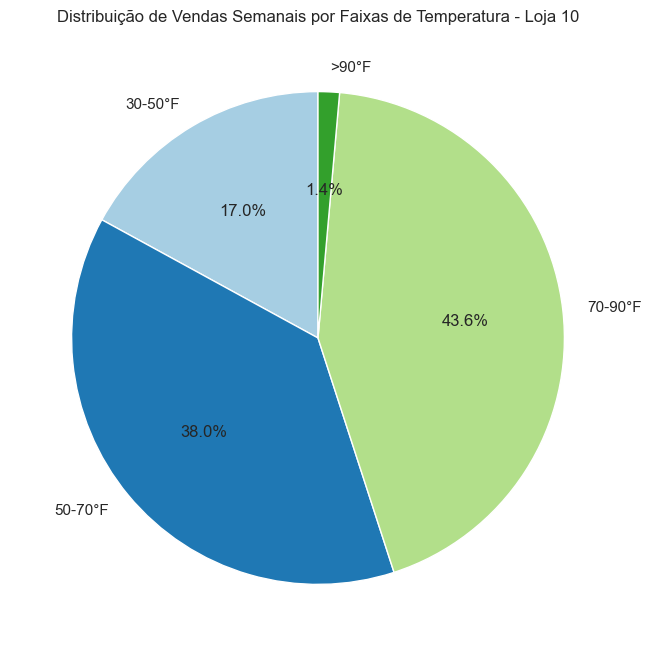

Vendas totais por faixa de temperatura (Loja 10):
<30°F: 0.00
30-50°F: 46,271,475.00
50-70°F: 103,103,265.99
70-90°F: 118,439,275.29
>90°F: 3,803,697.61


In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados da Loja 10
data = {
    'Store': [10] * 143,
    'Temperature': [
        42.38, 38.01, 46.04, 48.65, 52.91, 58.32, 55.21, 54.56, 62.37, 65.61, 66.89, 64.44, 67.37, 72.55,
        74.39, 76.63, 80.36, 80.81, 80.91, 84.85, 84.79, 80.28, 80.48, 83.58, 83.36, 81.57, 87.04, 87.24,
        86.65, 85.28, 81.21, 78.69, 82.17, 80.94, 71.89, 63.93, 67.18, 69.86, 69.64, 58.74, 59.61, 51.41,
        64.52, 49.27, 46.33, 49.84, 52.33, 48.43, 48.27, 35.4, 44.04, 43.83, 42.27, 36.39, 57.36, 62.9,
        59.58, 53.56, 62.76, 69.97, 59.17, 67.84, 71.27, 72.99, 72.03, 64.61, 75.64, 67.63, 77.72, 83, 83.13,
        86.41, 83.58, 85.55, 85.83, 88.54, 85.77, 86.83, 91.65, 90.76, 89.94, 87.96, 87.83, 76, 79.94, 75.8,
        79.69, 69.31, 71.74, 63.71, 66.57, 54.98, 59.11, 62.25, 60.14, 48.91, 43.93, 51.63, 47.96, 44.55,
        49.01, 48.53, 54.11, 54.26, 56.55, 48.02, 45.32, 57.25, 60.96, 58.76, 64.74, 65.93, 67.61, 70.43,
        69.07, 66.76, 67.23, 75.55, 73.77, 70.33, 77.22, 77.95, 78.3, 79.35, 78.39, 84.88, 81.57, 77.12,
        80.42, 82.66, 86.11, 85.05, 84.85, 77.66, 80.49, 83.96, 74.97, 69.87, 76.08, 68.55, 62.99, 67.97,
        69.16
    ],
    'Weekly_Sales': [
        2193048.75, 2176028.52, 2113432.58, 2006774.96, 1987090.09, 1941346.13, 1946875.06, 1893532.46,
        2138651.97, 2041069.37, 1826241.44, 1829521.83, 1790694.59, 1921432.16, 1808056.41, 1847613.58,
        1904618.17, 1931406.28, 1827521.71, 1837636.24, 1768172.31, 1845893.87, 1769793.37, 1828052.47,
        1831676.03, 1832664.03, 1949236.09, 1962996.7, 1983190.56, 1727565.42, 1766331.45, 1720530.23,
        1716755.78, 1655036.75, 1645892.97, 1772192.42, 1703850.25, 1740234.06, 1741308.56, 1832211.96,
        1895901.59, 1949177.13, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 1707298.14,
        1714309.9, 1710803.59, 1677556.18, 1715769.05, 1968045.91, 2115408.31, 2106934.55, 1967996.71,
        1958003.19, 1933469.15, 1884734.31, 1815798.85, 1827733.18, 1870720.73, 1781767.22, 2004831.14,
        1873646.34, 1841369.99, 1712995.44, 1720908.01, 1743000.38, 1792210.89, 1740063.1, 1817934.76,
        1711813.13, 1751369.75, 1699708.38, 1775068.4, 1774342.61, 1745841.33, 1886299.98, 1917397.63,
        1954849.68, 1728399.07, 1758587.35, 1670579.82, 1650894.3, 1685910.53, 1627707.31, 1788227.6,
        1704753.02, 1745928.56, 1771792.97, 1904438.59, 2076570.84, 1869087.85, 2950198.64, 2068097.18,
        2429310.9, 2555031.18, 3487986.89, 1930690.37, 1683401.78, 1711562.73, 1675562.94, 1632406,
        1867403.01, 2218595.8, 2168709.76, 2039415.74, 1990371.02, 1917483.1, 1930814.66, 1837457.69,
        1815760.42, 2163384.17, 1974687.51, 1777166.53, 1712987.56, 1821364.42, 1792345.3, 1795152.73,
        1830939.1, 1767471.48, 1840491.41, 1811562.88, 1755334.18, 1707481.9, 1805999.79, 1765571.91,
        1869967.03, 1817603.66, 1939440.09, 1880436.94, 1827797.4, 1764984.15, 1650285.54, 1708283.28,
        1640168.99, 1671857.57, 1694862.41, 1758971.38, 1713889.11, 1734834.82, 1744349.05
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Filtrando apenas os dados da Loja 10 (já garantido pelos dados fornecidos, mas incluído para clareza)
df = df[df['Store'] == 10]

# Categorizar os dados em faixas de temperatura
bins = [-float('inf'), 30, 50, 70, 90, float('inf')]  # Faixas de temperatura
labels = ['<30°F', '30-50°F', '50-70°F', '70-90°F', '>90°F']  # Rótulos das categorias
df['Temp_Range'] = pd.cut(df['Temperature'], bins=bins, labels=labels, include_lowest=True)

# Agrupar vendas por faixa de temperatura, especificando 'observed=False'
df_grouped = df.groupby('Temp_Range', observed=False)['Weekly_Sales'].sum()

# Filtrar faixas com vendas maiores que zero para o gráfico
df_grouped_filtered = df_grouped[df_grouped > 0]

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df_grouped_filtered, labels=df_grouped_filtered.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax.set_title('Distribuição de Vendas Semanais por Faixas de Temperatura - Loja 10')

# Salvar o gráfico como PNG
plt.savefig("grafico_pizza_por_temperatura_loja10.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Exibir os valores de vendas totais por faixa com formatação legível
print("Vendas totais por faixa de temperatura (Loja 10):")
for temp_range, sales in df_grouped.items():
    print(f"{temp_range}: {sales:,.2f}")

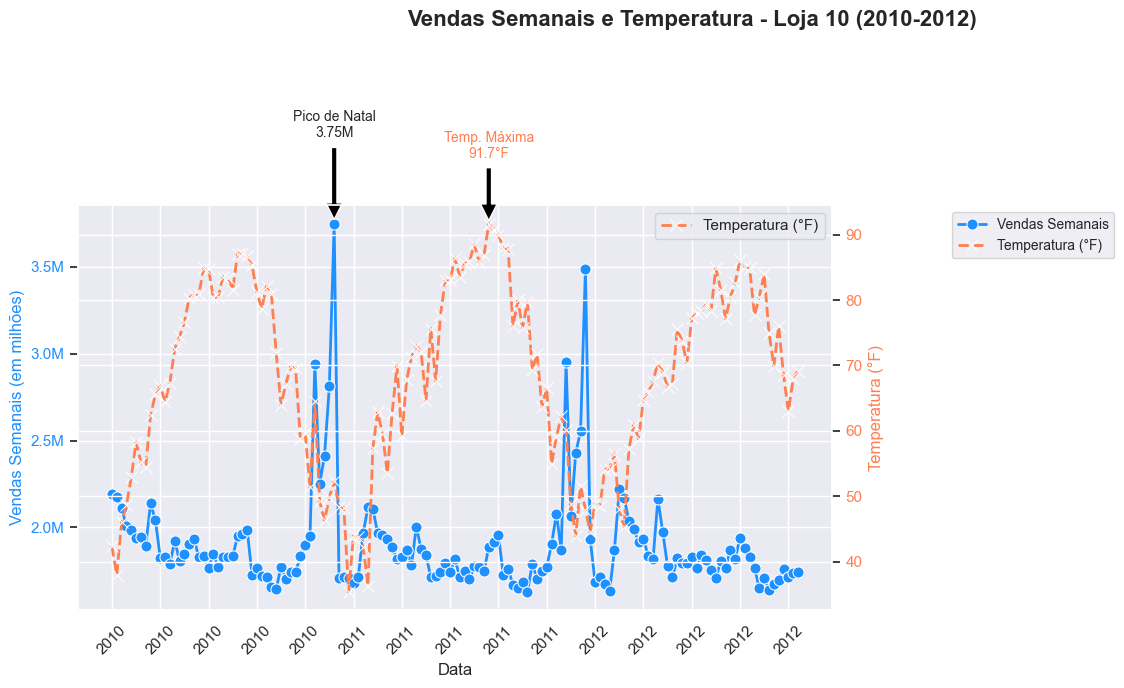

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Dados da Loja 10
data = {
    'Store': [10] * 143,
    'Date': [
        '05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010', '12-03-2010', '19-03-2010',
        '26-03-2010', '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010', '30-04-2010', '07-05-2010',
        '14-05-2010', '21-05-2010', '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010', '25-06-2010',
        '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
        '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010', '17-09-2010', '24-09-2010', '01-10-2010',
        '08-10-2010', '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010', '12-11-2010', '19-11-2010',
        '26-11-2010', '03-12-2010', '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010', '07-01-2011',
        '14-01-2011', '21-01-2011', '28-01-2011', '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
        '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011', '01-04-2011', '08-04-2011', '15-04-2011',
        '22-04-2011', '29-04-2011', '06-05-2011', '13-05-2011', '20-05-2011', '27-05-2011', '03-06-2011',
        '10-06-2011', '17-06-2011', '24-06-2011', '01-07-2011', '08-07-2011', '15-07-2011', '22-07-2011',
        '29-07-2011', '05-08-2011', '12-08-2011', '19-08-2011', '26-08-2011', '02-09-2011', '09-09-2011',
        '16-09-2011', '23-09-2011', '30-09-2011', '07-10-2011', '14-10-2011', '21-10-2011', '28-10-2011',
        '04-11-2011', '11-11-2011', '18-11-2011', '25-11-2011', '02-12-2011', '09-12-2011', '16-12-2011',
        '23-12-2011', '30-12-2011', '06-01-2012', '13-01-2012', '20-01-2012', '27-01-2012', '03-02-2012',
        '10-02-2012', '17-02-2012', '24-02-2012', '02-03-2012', '09-03-2012', '16-03-2012', '23-03-2012',
        '30-03-2012', '06-04-2012', '13-04-2012', '20-04-2012', '27-04-2012', '04-05-2012', '11-05-2012',
        '18-05-2012', '25-05-2012', '01-06-2012', '08-06-2012', '15-06-2012', '22-06-2012', '29-06-2012',
        '06-07-2012', '13-07-2012', '20-07-2012', '27-07-2012', '03-08-2012', '10-08-2012', '17-08-2012',
        '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012', '28-09-2012', '05-10-2012',
        '12-10-2012', '19-10-2012', '26-10-2012'
    ],
    'Weekly_Sales': [
        2193048.75, 2176028.52, 2113432.58, 2006774.96, 1987090.09, 1941346.13, 1946875.06, 1893532.46,
        2138651.97, 2041069.37, 1826241.44, 1829521.83, 1790694.59, 1921432.16, 1808056.41, 1847613.58,
        1904618.17, 1931406.28, 1827521.71, 1837636.24, 1768172.31, 1845893.87, 1769793.37, 1828052.47,
        1831676.03, 1832664.03, 1949236.09, 1962996.7, 1983190.56, 1727565.42, 1766331.45, 1720530.23,
        1716755.78, 1655036.75, 1645892.97, 1772192.42, 1703850.25, 1740234.06, 1741308.56, 1832211.96,
        1895901.59, 1949177.13, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 1707298.14,
        1714309.9, 1710803.59, 1677556.18, 1715769.05, 1968045.91, 2115408.31, 2106934.55, 1967996.71,
        1958003.19, 1933469.15, 1884734.31, 1815798.85, 1827733.18, 1870720.73, 1781767.22, 2004831.14,
        1873646.34, 1841369.99, 1712995.44, 1720908.01, 1743000.38, 1792210.89, 1740063.1, 1817934.76,
        1711813.13, 1751369.75, 1699708.38, 1775068.4, 1774342.61, 1745841.33, 1886299.98, 1917397.63,
        1954849.68, 1728399.07, 1758587.35, 1670579.82, 1650894.3, 1685910.53, 1627707.31, 1788227.6,
        1704753.02, 1745928.56, 1771792.97, 1904438.59, 2076570.84, 1869087.85, 2950198.64, 2068097.18,
        2429310.9, 2555031.18, 3487986.89, 1930690.37, 1683401.78, 1711562.73, 1675562.94, 1632406,
        1867403.01, 2218595.8, 2168709.76, 2039415.74, 1990371.02, 1917483.1, 1930814.66, 1837457.69,
        1815760.42, 2163384.17, 1974687.51, 1777166.53, 1712987.56, 1821364.42, 1792345.3, 1795152.73,
        1830939.1, 1767471.48, 1840491.41, 1811562.88, 1755334.18, 1707481.9, 1805999.79, 1765571.91,
        1869967.03, 1817603.66, 1939440.09, 1880436.94, 1827797.4, 1764984.15, 1650285.54, 1708283.28,
        1640168.99, 1671857.57, 1694862.41, 1758971.38, 1713889.11, 1734834.82, 1744349.05
    ],
    'Temperature': [
        42.38, 38.01, 46.04, 48.65, 52.91, 58.32, 55.21, 54.56, 62.37, 65.61, 66.89, 64.44, 67.37, 72.55,
        74.39, 76.63, 80.36, 80.81, 80.91, 84.85, 84.79, 80.28, 80.48, 83.58, 83.36, 81.57, 87.04, 87.24,
        86.65, 85.28, 81.21, 78.69, 82.17, 80.94, 71.89, 63.93, 67.18, 69.86, 69.64, 58.74, 59.61, 51.41,
        64.52, 49.27, 46.33, 49.84, 52.33, 48.43, 48.27, 35.4, 44.04, 43.83, 42.27, 36.39, 57.36, 62.9,
        59.58, 53.56, 62.76, 69.97, 59.17, 67.84, 71.27, 72.99, 72.03, 64.61, 75.64, 67.63, 77.72, 83, 83.13,
        86.41, 83.58, 85.55, 85.83, 88.54, 85.77, 86.83, 91.65, 90.76, 89.94, 87.96, 87.83, 76, 79.94, 75.8,
        79.69, 69.31, 71.74, 63.71, 66.57, 54.98, 59.11, 62.25, 60.14, 48.91, 43.93, 51.63, 47.96, 44.55,
        49.01, 48.53, 54.11, 54.26, 56.55, 48.02, 45.32, 57.25, 60.96, 58.76, 64.74, 65.93, 67.61, 70.43,
        69.07, 66.76, 67.23, 75.55, 73.77, 70.33, 77.22, 77.95, 78.3, 79.35, 78.39, 84.88, 81.57, 77.12,
        80.42, 82.66, 86.11, 85.05, 84.85, 77.66, 80.49, 83.96, 74.97, 69.87, 76.08, 68.55, 62.99, 67.97,
        69.16
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Converter a coluna 'Date' para formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtrar os dados para a Loja 10 (já garantido pelos dados fornecidos, mas incluído para clareza)
df_store_10 = df[df['Store'] == 10]

# Configurar estilo do Seaborn
sns.set_theme(style="darkgrid", palette="deep")

# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(14, 7))

# Função para formatar o eixo y em milhões
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.1f}M'

# Plotar Vendas Semanais
sns.lineplot(ax=ax1, x='Date', y='Weekly_Sales', data=df_store_10, marker='o', markersize=8, linewidth=2, color='dodgerblue', label='Vendas Semanais')

# Configurar eixo y primário (vendas)
ax1.set_xlabel('Data', fontsize=12)
ax1.set_ylabel('Vendas Semanais (em milhões)', fontsize=12, color='dodgerblue')
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.tick_params(axis='y', labelcolor='dodgerblue')

# Ajustar o eixo x para mostrar menos rótulos de data e rotacioná-los
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticks(df_store_10['Date'][::10])  # Mostrar a cada 10 semanas

# Criar eixo secundário para Temperatura
ax2 = ax1.twinx()
sns.lineplot(ax=ax2, x='Date', y='Temperature', data=df_store_10, linestyle='--', marker='x', markersize=8, linewidth=2, color='coral', label='Temperatura (°F)')

# Configurar eixo y secundário (temperatura)
ax2.set_ylabel('Temperatura (°F)', fontsize=12, color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Adicionar anotações para picos de vendas (ex.: Natal)
max_sales_idx = df_store_10['Weekly_Sales'].idxmax()
max_sales_date = df_store_10.loc[max_sales_idx, 'Date']
max_sales_value = df_store_10.loc[max_sales_idx, 'Weekly_Sales']
ax1.annotate(f'Pico de Natal\n{max_sales_value / 1_000_000:.2f}M', 
             xy=(max_sales_date, max_sales_value), 
             xytext=(max_sales_date, max_sales_value + 500_000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='center')

# Adicionar anotação para temperatura máxima
max_temp_idx = df_store_10['Temperature'].idxmax()
max_temp_date = df_store_10.loc[max_temp_idx, 'Date']
max_temp_value = df_store_10.loc[max_temp_idx, 'Temperature']
ax2.annotate(f'Temp. Máxima\n{max_temp_value:.1f}°F', 
             xy=(max_temp_date, max_temp_value), 
             xytext=(max_temp_date, max_temp_value + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='center', color='coral')

# Combinar as legendas e movê-las para fora do gráfico
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=10)

# Título e layout
fig.suptitle('Vendas Semanais e Temperatura - Loja 10 (2010-2012)', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 0.85, 0.95])  # Ajustar o layout para evitar sobreposição

# Salvar o gráfico como PNG
plt.savefig("grafico_vendas_loja_10_melhorado.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

Análise do Gráfico
Picos de Vendas: O maior pico de vendas ocorre em 24-12-2010 (3.75M), coincidindo com o Natal, e outro pico significativo em 23-12-2011 (3.49M), também no Natal. Esses picos não parecem estar diretamente relacionados à temperatura, que é moderada nessas datas (48.43°F e 48.02°F, respectivamente).
Temperatura Máxima: A temperatura mais alta (91.65°F) ocorre em 05-08-2011, com vendas de 1.77M, que estão abaixo da média, sugerindo que temperaturas muito altas podem reduzir as vendas.
Tendências Gerais: As vendas tendem a ser mais altas no final do ano (novembro e dezembro), independentemente da temperatura, enquanto temperaturas extremas (muito altas ou muito baixas) parecem estar associadas a vendas mais baixas em outros períodos.

In [3]:
import plotly.graph_objects as go
import pandas as pd

# Dados da Loja 10
data = {
    'Store': [10] * 143,
    'Date': [
        '05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010', '12-03-2010', '19-03-2010',
        '26-03-2010', '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010', '30-04-2010', '07-05-2010',
        '14-05-2010', '21-05-2010', '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010', '25-06-2010',
        '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
        '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010', '17-09-2010', '24-09-2010', '01-10-2010',
        '08-10-2010', '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010', '12-11-2010', '19-11-2010',
        '26-11-2010', '03-12-2010', '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010', '07-01-2011',
        '14-01-2011', '21-01-2011', '28-01-2011', '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
        '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011', '01-04-2011', '08-04-2011', '15-04-2011',
        '22-04-2011', '29-04-2011', '06-05-2011', '13-05-2011', '20-05-2011', '27-05-2011', '03-06-2011',
        '10-06-2011', '17-06-2011', '24-06-2011', '01-07-2011', '08-07-2011', '15-07-2011', '22-07-2011',
        '29-07-2011', '05-08-2011', '12-08-2011', '19-08-2011', '26-08-2011', '02-09-2011', '09-09-2011',
        '16-09-2011', '23-09-2011', '30-09-2011', '07-10-2011', '14-10-2011', '21-10-2011', '28-10-2011',
        '04-11-2011', '11-11-2011', '18-11-2011', '25-11-2011', '02-12-2011', '09-12-2011', '16-12-2011',
        '23-12-2011', '30-12-2011', '06-01-2012', '13-01-2012', '20-01-2012', '27-01-2012', '03-02-2012',
        '10-02-2012', '17-02-2012', '24-02-2012', '02-03-2012', '09-03-2012', '16-03-2012', '23-03-2012',
        '30-03-2012', '06-04-2012', '13-04-2012', '20-04-2012', '27-04-2012', '04-05-2012', '11-05-2012',
        '18-05-2012', '25-05-2012', '01-06-2012', '08-06-2012', '15-06-2012', '22-06-2012', '29-06-2012',
        '06-07-2012', '13-07-2012', '20-07-2012', '27-07-2012', '03-08-2012', '10-08-2012', '17-08-2012',
        '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012', '28-09-2012', '05-10-2012',
        '12-10-2012', '19-10-2012', '26-10-2012'
    ],
    'Weekly_Sales': [
        2193048.75, 2176028.52, 2113432.58, 2006774.96, 1987090.09, 1941346.13, 1946875.06, 1893532.46,
        2138651.97, 2041069.37, 1826241.44, 1829521.83, 1790694.59, 1921432.16, 1808056.41, 1847613.58,
        1904618.17, 1931406.28, 1827521.71, 1837636.24, 1768172.31, 1845893.87, 1769793.37, 1828052.47,
        1831676.03, 1832664.03, 1949236.09, 1962996.7, 1983190.56, 1727565.42, 1766331.45, 1720530.23,
        1716755.78, 1655036.75, 1645892.97, 1772192.42, 1703850.25, 1740234.06, 1741308.56, 1832211.96,
        1895901.59, 1949177.13, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 1707298.14,
        1714309.9, 1710803.59, 1677556.18, 1715769.05, 1968045.91, 2115408.31, 2106934.55, 1967996.71,
        1958003.19, 1933469.15, 1884734.31, 1815798.85, 1827733.18, 1870720.73, 1781767.22, 2004831.14,
        1873646.34, 1841369.99, 1712995.44, 1720908.01, 1743000.38, 1792210.89, 1740063.1, 1817934.76,
        1711813.13, 1751369.75, 1699708.38, 1775068.4, 1774342.61, 1745841.33, 1886299.98, 1917397.63,
        1954849.68, 1728399.07, 1758587.35, 1670579.82, 1650894.3, 1685910.53, 1627707.31, 1788227.6,
        1704753.02, 1745928.56, 1771792.97, 1904438.59, 2076570.84, 1869087.85, 2950198.64, 2068097.18,
        2429310.9, 2555031.18, 3487986.89, 1930690.37, 1683401.78, 1711562.73, 1675562.94, 1632406,
        1867403.01, 2218595.8, 2168709.76, 2039415.74, 1990371.02, 1917483.1, 1930814.66, 1837457.69,
        1815760.42, 2163384.17, 1974687.51, 1777166.53, 1712987.56, 1821364.42, 1792345.3, 1795152.73,
        1830939.1, 1767471.48, 1840491.41, 1811562.88, 1755334.18, 1707481.9, 1805999.79, 1765571.91,
        1869967.03, 1817603.66, 1939440.09, 1880436.94, 1827797.4, 1764984.15, 1650285.54, 1708283.28,
        1640168.99, 1671857.57, 1694862.41, 1758971.38, 1713889.11, 1734834.82, 1744349.05
    ],
    'Temperature': [
        42.38, 38.01, 46.04, 48.65, 52.91, 58.32, 55.21, 54.56, 62.37, 65.61, 66.89, 64.44, 67.37, 72.55,
        74.39, 76.63, 80.36, 80.81, 80.91, 84.85, 84.79, 80.28, 80.48, 83.58, 83.36, 81.57, 87.04, 87.24,
        86.65, 85.28, 81.21, 78.69, 82.17, 80.94, 71.89, 63.93, 67.18, 69.86, 69.64, 58.74, 59.61, 51.41,
        64.52, 49.27, 46.33, 49.84, 52.33, 48.43, 48.27, 35.4, 44.04, 43.83, 42.27, 36.39, 57.36, 62.9,
        59.58, 53.56, 62.76, 69.97, 59.17, 67.84, 71.27, 72.99, 72.03, 64.61, 75.64, 67.63, 77.72, 83, 83.13,
        86.41, 83.58, 85.55, 85.83, 88.54, 85.77, 86.83, 91.65, 90.76, 89.94, 87.96, 87.83, 76, 79.94, 75.8,
        79.69, 69.31, 71.74, 63.71, 66.57, 54.98, 59.11, 62.25, 60.14, 48.91, 43.93, 51.63, 47.96, 44.55,
        49.01, 48.53, 54.11, 54.26, 56.55, 48.02, 45.32, 57.25, 60.96, 58.76, 64.74, 65.93, 67.61, 70.43,
        69.07, 66.76, 67.23, 75.55, 73.77, 70.33, 77.22, 77.95, 78.3, 79.35, 78.39, 84.88, 81.57, 77.12,
        80.42, 82.66, 86.11, 85.05, 84.85, 77.66, 80.49, 83.96, 74.97, 69.87, 76.08, 68.55, 62.99, 67.97,
        69.16
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Converter a coluna 'Date' para formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtrar os dados para a Loja 10
df_store_10 = df[df['Store'] == 10]

# Criar gráfico interativo com Plotly
fig = go.Figure()

# Adicionar linha para Vendas Semanais (convertendo para milhões)
fig.add_trace(go.Scatter(
    x=df_store_10['Date'], 
    y=df_store_10['Weekly_Sales'] / 1_000_000,  # Convertendo para milhões
    mode='lines+markers', 
    name='Vendas Semanais', 
    line=dict(color='dodgerblue', width=2),
    marker=dict(size=8)
))

# Adicionar linha para Temperatura
fig.add_trace(go.Scatter(
    x=df_store_10['Date'], 
    y=df_store_10['Temperature'],
    mode='lines+markers', 
    name='Temperatura (°F)', 
    line=dict(color='coral', dash='dash', width=2),
    marker=dict(size=8),
    yaxis='y2'  # Associar ao eixo y secundário
))

# Atualizar o layout para título, eixos e anotações
fig.update_layout(
    title='Vendas Semanais e Temperatura - Loja 10 (2010-2012)',
    xaxis_title='Data',
    yaxis_title='Vendas Semanais (em milhões)',
    yaxis2=dict(
        title='Temperatura (°F)',
        overlaying='y',
        side='right'
    ),
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(
        tickangle=45,
        tickmode='auto',
        nticks=10  # Ajustar a quantidade de rótulos no eixo x
    ),
    width=1000,
    height=600,
    margin=dict(l=50, r=50, t=100, b=100)
)

# Adicionar anotações para picos de vendas e temperatura
# Pico de vendas (Natal 2010)
max_sales_idx = df_store_10['Weekly_Sales'].idxmax()
max_sales_date = df_store_10.loc[max_sales_idx, 'Date']
max_sales_value = df_store_10.loc[max_sales_idx, 'Weekly_Sales'] / 1_000_000
fig.add_annotation(
    x=max_sales_date,
    y=max_sales_value,
    text=f'Pico de Natal<br>{max_sales_value:.2f}M',
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

# Temperatura máxima
max_temp_idx = df_store_10['Temperature'].idxmax()
max_temp_date = df_store_10.loc[max_temp_idx, 'Date']
max_temp_value = df_store_10.loc[max_temp_idx, 'Temperature']
fig.add_annotation(
    x=max_temp_date,
    y=max_temp_value,
    text=f'Temp. Máxima<br>{max_temp_value:.1f}°F',
    showarrow=True,
    arrowhead=2,
    ax=-20,
    ay=-30,
    yref='y2'  # Referenciar o eixo y secundário
)

# Exportar o gráfico como imagem estática para o GitHub
fig.write_image("grafico_vendas_temperatura_loja10.png", scale=2)

# Exibir gráfico interativo (funciona localmente)
fig.show()


In [9]:
import pandas as pd

# Dados da Loja 10
data = {
    'Store': [10] * 143,
    'Date': [
        '05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010', '12-03-2010', '19-03-2010',
        '26-03-2010', '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010', '30-04-2010', '07-05-2010',
        '14-05-2010', '21-05-2010', '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010', '25-06-2010',
        '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
        '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010', '17-09-2010', '24-09-2010', '01-10-2010',
        '08-10-2010', '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010', '12-11-2010', '19-11-2010',
        '26-11-2010', '03-12-2010', '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010', '07-01-2011',
        '14-01-2011', '21-01-2011', '28-01-2011', '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
        '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011', '01-04-2011', '08-04-2011', '15-04-2011',
        '22-04-2011', '29-04-2011', '06-05-2011', '13-05-2011', '20-05-2011', '27-05-2011', '03-06-2011',
        '10-06-2011', '17-06-2011', '24-06-2011', '01-07-2011', '08-07-2011', '15-07-2011', '22-07-2011',
        '29-07-2011', '05-08-2011', '12-08-2011', '19-08-2011', '26-08-2011', '02-09-2011', '09-09-2011',
        '16-09-2011', '23-09-2011', '30-09-2011', '07-10-2011', '14-10-2011', '21-10-2011', '28-10-2011',
        '04-11-2011', '11-11-2011', '18-11-2011', '25-11-2011', '02-12-2011', '09-12-2011', '16-12-2011',
        '23-12-2011', '30-12-2011', '06-01-2012', '13-01-2012', '20-01-2012', '27-01-2012', '03-02-2012',
        '10-02-2012', '17-02-2012', '24-02-2012', '02-03-2012', '09-03-2012', '16-03-2012', '23-03-2012',
        '30-03-2012', '06-04-2012', '13-04-2012', '20-04-2012', '27-04-2012', '04-05-2012', '11-05-2012',
        '18-05-2012', '25-05-2012', '01-06-2012', '08-06-2012', '15-06-2012', '22-06-2012', '29-06-2012',
        '06-07-2012', '13-07-2012', '20-07-2012', '27-07-2012', '03-08-2012', '10-08-2012', '17-08-2012',
        '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012', '28-09-2012', '05-10-2012',
        '12-10-2012', '19-10-2012', '26-10-2012'
    ],
    'Weekly_Sales': [
        2193048.75, 2176028.52, 2113432.58, 2006774.96, 1987090.09, 1941346.13, 1946875.06, 1893532.46,
        2138651.97, 2041069.37, 1826241.44, 1829521.83, 1790694.59, 1921432.16, 1808056.41, 1847613.58,
        1904618.17, 1931406.28, 1827521.71, 1837636.24, 1768172.31, 1845893.87, 1769793.37, 1828052.47,
        1831676.03, 1832664.03, 1949236.09, 1962996.7, 1983190.56, 1727565.42, 1766331.45, 1720530.23,
        1716755.78, 1655036.75, 1645892.97, 1772192.42, 1703850.25, 1740234.06, 1741308.56, 1832211.96,
        1895901.59, 1949177.13, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 1707298.14,
        1714309.9, 1710803.59, 1677556.18, 1715769.05, 1968045.91, 2115408.31, 2106934.55, 1967996.71,
        1958003.19, 1933469.15, 1884734.31, 1815798.85, 1827733.18, 1870720.73, 1781767.22, 2004831.14,
        1873646.34, 1841369.99, 1712995.44, 1720908.01, 1743000.38, 1792210.89, 1740063.1, 1817934.76,
        1711813.13, 1751369.75, 1699708.38, 1775068.4, 1774342.61, 1745841.33, 1886299.98, 1917397.63,
        1954849.68, 1728399.07, 1758587.35, 1670579.82, 1650894.3, 1685910.53, 1627707.31, 1788227.6,
        1704753.02, 1745928.56, 1771792.97, 1904438.59, 2076570.84, 1869087.85, 2950198.64, 2068097.18,
        2429310.9, 2555031.18, 3487986.89, 1930690.37, 1683401.78, 1711562.73, 1675562.94, 1632406,
        1867403.01, 2218595.8, 2168709.76, 2039415.74, 1990371.02, 1917483.1, 1930814.66, 1837457.69,
        1815760.42, 2163384.17, 1974687.51, 1777166.53, 1712987.56, 1821364.42, 1792345.3, 1795152.73,
        1830939.1, 1767471.48, 1840491.41, 1811562.88, 1755334.18, 1707481.9, 1805999.79, 1765571.91,
        1869967.03, 1817603.66, 1939440.09, 1880436.94, 1827797.4, 1764984.15, 1650285.54, 1708283.28,
        1640168.99, 1671857.57, 1694862.41, 1758971.38, 1713889.11, 1734834.82, 1744349.05
    ],
    'Temperature': [
        42.38, 38.01, 46.04, 48.65, 52.91, 58.32, 55.21, 54.56, 62.37, 65.61, 66.89, 64.44, 67.37, 72.55,
        74.39, 76.63, 80.36, 80.81, 80.91, 84.85, 84.79, 80.28, 80.48, 83.58, 83.36, 81.57, 87.04, 87.24,
        86.65, 85.28, 81.21, 78.69, 82.17, 80.94, 71.89, 63.93, 67.18, 69.86, 69.64, 58.74, 59.61, 51.41,
        64.52, 49.27, 46.33, 49.84, 52.33, 48.43, 48.27, 35.4, 44.04, 43.83, 42.27, 36.39, 57.36, 62.9,
        59.58, 53.56, 62.76, 69.97, 59.17, 67.84, 71.27, 72.99, 72.03, 64.61, 75.64, 67.63, 77.72, 83, 83.13,
        86.41, 83.58, 85.55, 85.83, 88.54, 85.77, 86.83, 91.65, 90.76, 89.94, 87.96, 87.83, 76, 79.94, 75.8,
        79.69, 69.31, 71.74, 63.71, 66.57, 54.98, 59.11, 62.25, 60.14, 48.91, 43.93, 51.63, 47.96, 44.55,
        49.01, 48.53, 54.11, 54.26, 56.55, 48.02, 45.32, 57.25, 60.96, 58.76, 64.74, 65.93, 67.61, 70.43,
        69.07, 66.76, 67.23, 75.55, 73.77, 70.33, 77.22, 77.95, 78.3, 79.35, 78.39, 84.88, 81.57, 77.12,
        80.42, 82.66, 86.11, 85.05, 84.85, 77.66, 80.49, 83.96, 74.97, 69.87, 76.08, 68.55, 62.99, 67.97,
        69.16
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Converter a coluna 'Date' para formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtrar os dados para a Loja 10
df_store_10 = df[df['Store'] == 10]

# Selecionar apenas as colunas relevantes
df_store_10 = df_store_10[['Date', 'Weekly_Sales', 'Temperature']]

# Ordenar por data para garantir apresentação cronológica
df_store_10 = df_store_10.sort_values('Date')

# Estilizar a tabela
styled_table = df_store_10.style.format({
    'Date': lambda x: x.strftime('%d-%m-%Y'),  # Formatar a data como DD-MM-YYYY
    'Weekly_Sales': "${:,.2f}",
    'Temperature': "{:.1f} °F"
}).background_gradient(cmap='Blues', subset=['Weekly_Sales'], vmin=1_500_000, vmax=3_800_000) \
  .background_gradient(cmap='Reds', subset=['Temperature'], vmin=30, vmax=95) \
  .set_caption('Vendas Semanais e Temperatura - Loja 10 (2010-2012)') \
  .set_table_styles([
      {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#333')]},  # Estilizar o título
      {'selector': 'th', 'props': [('font-size', '14px'), ('background-color', '#f4f4f4'), ('border', '1px solid #ddd')]},  # Estilizar cabeçalhos
      {'selector': 'td', 'props': [('font-size', '12px'), ('border', '1px solid #ddd'), ('text-align', 'center')]}  # Estilizar células
  ]) \
  .hide(axis="index")

# Exibir a tabela estilizada
styled_table


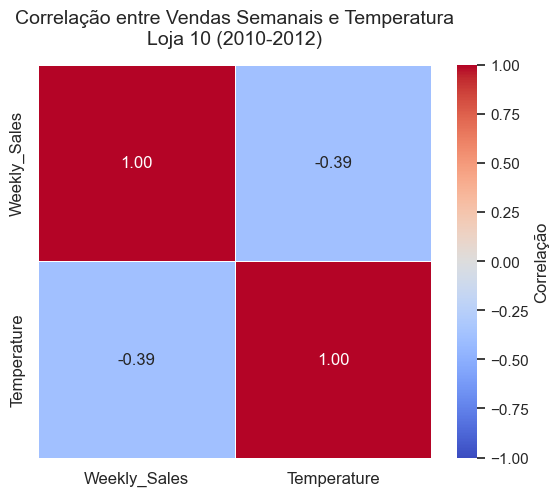

Matriz de Correlação (Loja 10):
              Weekly_Sales  Temperature
Weekly_Sales      1.000000    -0.386326
Temperature      -0.386326     1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dados da Loja 10
data = {
    'Store': [10] * 143,
    'Date': [
        '05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010', '12-03-2010', '19-03-2010',
        '26-03-2010', '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010', '30-04-2010', '07-05-2010',
        '14-05-2010', '21-05-2010', '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010', '25-06-2010',
        '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
        '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010', '17-09-2010', '24-09-2010', '01-10-2010',
        '08-10-2010', '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010', '12-11-2010', '19-11-2010',
        '26-11-2010', '03-12-2010', '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010', '07-01-2011',
        '14-01-2011', '21-01-2011', '28-01-2011', '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
        '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011', '01-04-2011', '08-04-2011', '15-04-2011',
        '22-04-2011', '29-04-2011', '06-05-2011', '13-05-2011', '20-05-2011', '27-05-2011', '03-06-2011',
        '10-06-2011', '17-06-2011', '24-06-2011', '01-07-2011', '08-07-2011', '15-07-2011', '22-07-2011',
        '29-07-2011', '05-08-2011', '12-08-2011', '19-08-2011', '26-08-2011', '02-09-2011', '09-09-2011',
        '16-09-2011', '23-09-2011', '30-09-2011', '07-10-2011', '14-10-2011', '21-10-2011', '28-10-2011',
        '04-11-2011', '11-11-2011', '18-11-2011', '25-11-2011', '02-12-2011', '09-12-2011', '16-12-2011',
        '23-12-2011', '30-12-2011', '06-01-2012', '13-01-2012', '20-01-2012', '27-01-2012', '03-02-2012',
        '10-02-2012', '17-02-2012', '24-02-2012', '02-03-2012', '09-03-2012', '16-03-2012', '23-03-2012',
        '30-03-2012', '06-04-2012', '13-04-2012', '20-04-2012', '27-04-2012', '04-05-2012', '11-05-2012',
        '18-05-2012', '25-05-2012', '01-06-2012', '08-06-2012', '15-06-2012', '22-06-2012', '29-06-2012',
        '06-07-2012', '13-07-2012', '20-07-2012', '27-07-2012', '03-08-2012', '10-08-2012', '17-08-2012',
        '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012', '28-09-2012', '05-10-2012',
        '12-10-2012', '19-10-2012', '26-10-2012'
    ],
    'Weekly_Sales': [
        2193048.75, 2176028.52, 2113432.58, 2006774.96, 1987090.09, 1941346.13, 1946875.06, 1893532.46,
        2138651.97, 2041069.37, 1826241.44, 1829521.83, 1790694.59, 1921432.16, 1808056.41, 1847613.58,
        1904618.17, 1931406.28, 1827521.71, 1837636.24, 1768172.31, 1845893.87, 1769793.37, 1828052.47,
        1831676.03, 1832664.03, 1949236.09, 1962996.7, 1983190.56, 1727565.42, 1766331.45, 1720530.23,
        1716755.78, 1655036.75, 1645892.97, 1772192.42, 1703850.25, 1740234.06, 1741308.56, 1832211.96,
        1895901.59, 1949177.13, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 1707298.14,
        1714309.9, 1710803.59, 1677556.18, 1715769.05, 1968045.91, 2115408.31, 2106934.55, 1967996.71,
        1958003.19, 1933469.15, 1884734.31, 1815798.85, 1827733.18, 1870720.73, 1781767.22, 2004831.14,
        1873646.34, 1841369.99, 1712995.44, 1720908.01, 1743000.38, 1792210.89, 1740063.1, 1817934.76,
        1711813.13, 1751369.75, 1699708.38, 1775068.4, 1774342.61, 1745841.33, 1886299.98, 1917397.63,
        1954849.68, 1728399.07, 1758587.35, 1670579.82, 1650894.3, 1685910.53, 1627707.31, 1788227.6,
        1704753.02, 1745928.56, 1771792.97, 1904438.59, 2076570.84, 1869087.85, 2950198.64, 2068097.18,
        2429310.9, 2555031.18, 3487986.89, 1930690.37, 1683401.78, 1711562.73, 1675562.94, 1632406,
        1867403.01, 2218595.8, 2168709.76, 2039415.74, 1990371.02, 1917483.1, 1930814.66, 1837457.69,
        1815760.42, 2163384.17, 1974687.51, 1777166.53, 1712987.56, 1821364.42, 1792345.3, 1795152.73,
        1830939.1, 1767471.48, 1840491.41, 1811562.88, 1755334.18, 1707481.9, 1805999.79, 1765571.91,
        1869967.03, 1817603.66, 1939440.09, 1880436.94, 1827797.4, 1764984.15, 1650285.54, 1708283.28,
        1640168.99, 1671857.57, 1694862.41, 1758971.38, 1713889.11, 1734834.82, 1744349.05
    ],
    'Temperature': [
        42.38, 38.01, 46.04, 48.65, 52.91, 58.32, 55.21, 54.56, 62.37, 65.61, 66.89, 64.44, 67.37, 72.55,
        74.39, 76.63, 80.36, 80.81, 80.91, 84.85, 84.79, 80.28, 80.48, 83.58, 83.36, 81.57, 87.04, 87.24,
        86.65, 85.28, 81.21, 78.69, 82.17, 80.94, 71.89, 63.93, 67.18, 69.86, 69.64, 58.74, 59.61, 51.41,
        64.52, 49.27, 46.33, 49.84, 52.33, 48.43, 48.27, 35.4, 44.04, 43.83, 42.27, 36.39, 57.36, 62.9,
        59.58, 53.56, 62.76, 69.97, 59.17, 67.84, 71.27, 72.99, 72.03, 64.61, 75.64, 67.63, 77.72, 83, 83.13,
        86.41, 83.58, 85.55, 85.83, 88.54, 85.77, 86.83, 91.65, 90.76, 89.94, 87.96, 87.83, 76, 79.94, 75.8,
        79.69, 69.31, 71.74, 63.71, 66.57, 54.98, 59.11, 62.25, 60.14, 48.91, 43.93, 51.63, 47.96, 44.55,
        49.01, 48.53, 54.11, 54.26, 56.55, 48.02, 45.32, 57.25, 60.96, 58.76, 64.74, 65.93, 67.61, 70.43,
        69.07, 66.76, 67.23, 75.55, 73.77, 70.33, 77.22, 77.95, 78.3, 79.35, 78.39, 84.88, 81.57, 77.12,
        80.42, 82.66, 86.11, 85.05, 84.85, 77.66, 80.49, 83.96, 74.97, 69.87, 76.08, 68.55, 62.99, 67.97,
        69.16
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Converter a coluna 'Date' para formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtrar os dados para a Loja 10
df_store_10 = df[df['Store'] == 10]

# Selecionar apenas as colunas relevantes
df_store_10 = df_store_10[['Weekly_Sales', 'Temperature']]

# Calcular a correlação entre as variáveis
correlation_matrix = df_store_10[['Weekly_Sales', 'Temperature']].corr()

# Gráfico de calor
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            vmin=-1, vmax=1,  # Definir limites para a escala de correlação
            annot_kws={'size': 12},  # Ajustar o tamanho da fonte das anotações
            square=True,  # Tornar as células quadradas
            linewidths=0.5,  # Adicionar bordas entre as células
            cbar_kws={'label': 'Correlação'}  # Adicionar rótulo à barra de cores
)
plt.title('Correlação entre Vendas Semanais e Temperatura\nLoja 10 (2010-2012)', fontsize=14, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Salvar o gráfico como PNG
plt.savefig('heatmap_correlacao_loja_10.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Exibir a matriz de correlação em texto para referência
print("Matriz de Correlação (Loja 10):")
print(correlation_matrix)

Correlação entre Vendas e Temperatura na Loja 10: Uma Análise Detalhada

A análise dos dados da Loja 10 revela uma relação complexa e significativa entre a temperatura e o volume de vendas semanais. Observa-se um padrão onde a queda nas temperaturas parece preceder um pico de vendas, 
sugerindo uma possível antecipação dos consumidores para se abastecerem antes da chegada de um frio mais intenso (abaixo de 40°F). 
Essa queda acentuada na temperatura, por sua vez, coincide com uma notável redução na circulação de clientes, impactando negativamente as vendas.

Nas faixas de temperatura mais amenas (entre 40°F e 70°F), as vendas tendem a apresentar uma melhora consistente. Contudo, ao alcançarmos temperaturas mais extremas, próximas dos 90°F, 
as vendas da Loja 10 atingem seus níveis mais baixos.

Diante dessa sensibilidade às variações de temperatura, torna-se crucial considerar a implementação de modalidades de atendimento ao cliente aprimoradas. 
A oferta de entregas personalizadas e eficientes, juntamente com opções de retirada na loja de maneira dinâmica e conveniente, pode mitigar o impacto da menor circulação em temperaturas extremas, 
proporcionando maior conforto e praticidade aos clientes.

Adicionalmente, a análise das tendências de consumo por faixa de temperatura pode fornecer insights valiosos sobre quais produtos experimentam um aumento na demanda em diferentes condições climáticas. 
Essa compreensão permitirá à Loja 10 otimizar seu estoque e suas estratégias de marketing, capitalizando as mudanças nos hábitos de consumo influenciados pela temperatura.

Em suma, a temperatura emerge como um fator ambiental com influência direta e considerável sobre o desempenho de vendas da Loja 10. 
A adaptação das estratégias de atendimento e a análise proativa do comportamento do consumidor em relação às condições climáticas são elementos chave para sustentar e impulsionar as vendas, 
mesmo em cenários de temperaturas extremas.